# Previsione del prezzo di un diamante sulla base delle sue proprietà fisiche

Progetto per il corso di Programmazione di applicazioni Data Intensive A.A. 2020/2021

**Realizzato da:** Colotti Manuel Enrique

Email: manuel.colotti@studio.unibo.it \
Matricola: 0000873872

## Caricamento Librerie

Per iniziare possiamo procedere con il caricamento delle librerie che verranno utilizzate.

- NumPy utilizzata per lavorare su strutture dati come array N-dimensionali

- Pandas per gestire i dati contenuti nel dataset e la loro manipolazione all'interno di Dataframe

- Matplotlib per la rappresentazione di grafici di vario genere


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

## Descrizione del problema

Possiamo ora procedere con l'importare i dati del dataset presente su [Kaggle](https://https://www.kaggle.com/) contenenti le informazioni relative alle proprietà fisiche di quasi 54000 [Diamanti](https://https://www.kaggle.com/shivam2503/diamonds) in un file formato .csv.

L'obbiettivo del progetto sarà quello di predire il prezzo di un diamante basandosi sulle sue caratteristiche.

### Descrizione del significato delle variabili

Le variabili presenti nel Dataset sono le seguenti:

- **price**: variabile continua da predire che indica il prezzo in dollari di un diamante

- **x**: lunghezza in millimetri del diamante

- **y**: larghezza in millimetri del diamante

- **z**: profondità in millimetri del diamante

- **carat**: unità di misura del peso di pietre preziose e perle

- **cut**: variabile che descrive la qualità del diamante tra un insieme discreto di valori. I valori che può assumere in ordine crescente di qualità sono: Fair, Good, Very Good, Premium, Ideal

- **color**: variabile che descrive il colore di un diamante tra un insieme discreto di valori. I valori che può assumere, dal migliore al peggiore, sono: D, E, F, G, H, I, J

- **clarity**: descrive la chiarezza di un diamante, i valori che può assumere, dal migliore al peggiore sono: FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

- **depth**: valore percentuale ottenuto come il rapporto tra l'altezza del diamante e la media della sua cintura, $depth = \frac{z}{mean(x,y)}$

- **table**: larghezza della parte piatta superiore di un diamante valutata nel punto più largo




In [2]:
import os.path
file_csv = "./diamonds.csv";
if not os.path.exists(file_csv):
    !git clone https://github.com/RunCor399/ProgettoDataIntensive2021.git
    !mv ProgettoDataIntensive2021/diamonds.csv ./

Cloning into 'ProgettoDataIntensive2021'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [3]:
diamonds = pd.read_csv(file_csv);

In [4]:
diamonds.head(1)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


Visualizzando le informazioni relative allo spazio occupato dal dataset e al tipo di variabili possiamo immediatamente notare che pandas ha classificato le variabili ordinali come oggetti.

In [5]:
diamonds.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Columns: 11 entries, Unnamed: 0 to z
dtypes: float64(6), int64(2), object(3)
memory usage: 12.6 MB


Modificando il tipo delle feature **cut**, **color** e **clarity** ed eliminando la colonna **Unnamed: 0** possiamo ridurre lo spazio occupato dalle variabili del dataset

In [6]:
ordinal = ["cut", "color", "clarity"]

diamonds = pd.read_csv(file_csv, dtype={ord:"category" for ord in ordinal})

In [7]:
diamonds.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
diamonds.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Columns: 10 entries, carat to z
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


Lo spazio occupato ora dall'intero dataset si è ridotto all'incirca del 75% cambiando il tipo delle tre variabili object ed eliminando una colonna per noi inutile

In [9]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Analisi dei Dati

Di seguito verranno visualizzate alcune statistiche relative alle informazioni contenute nel Dataset.

Possiamo iniziare da una generica descrizione dell'intero Dataframe.

In [10]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Da questa sintetica descrizione possiamo valutare le medie, i valori massimi e minimi, la deviazione standard e i percentili delle varie features.

Possiamo ad esempio notare che il prezzo medio dei diamanti di 3932\$ è relativamente basso rispetto al prezzo massimo di 18823\$, questa variabilità si ripercuote infatti sulla deviazione standard che risulta essere molto alta

Lo stesso discorso del prezzo vale per il peso medio in carati dei diamanti di 0.79kt rispetto al peso massimo rilevato di 5.01kt



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


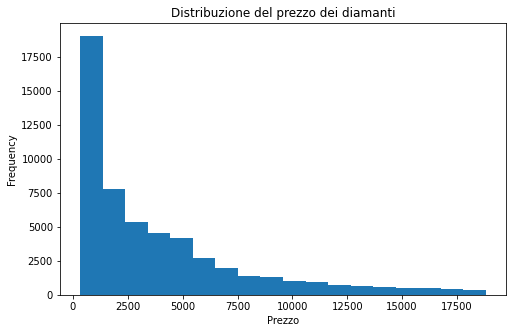

In [11]:
diamonds["price"].plot.hist(bins=18, figsize=(8, 5));
plt.axes().set_title("Distribuzione del prezzo dei diamanti");
plt.xlabel("Prezzo");


Da questo istogramma è facilmente visualizzabile come i prezzi dei diamanti si concentrino maggiormente nell'intervallo di prezzi che vanno tra i 300\$ e i 2000\$

Text(0.5, 1.0, 'Distribuzione dei tagli di diamante')

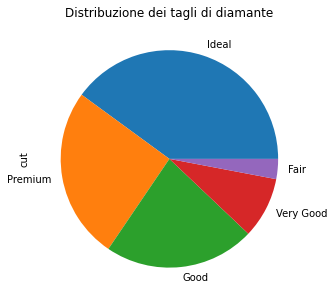

In [12]:
cut_labels = diamonds["cut"].unique();


diamonds["cut"].value_counts().plot.pie(labels = cut_labels, figsize=(5,5));
plt.title("Distribuzione dei tagli di diamante")

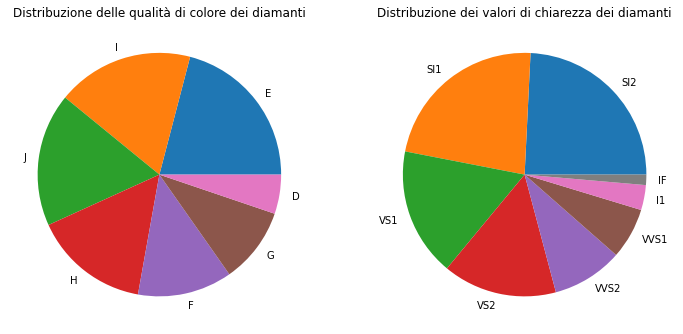

In [13]:
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(12,12))

color_labels = diamonds["color"].unique();
clarity_labels = diamonds["clarity"].unique();

plt1.title.set_text('Distribuzione delle qualità di colore dei diamanti')
plt2.title.set_text('Distribuzione dei valori di chiarezza dei diamanti')

plt1.pie(diamonds["color"].value_counts(), labels = color_labels);
plt2.pie(diamonds["clarity"].value_counts(), labels = clarity_labels);

Grazie ai tre grafici a torta riportati qui sopra possiamo vedere come:

- Nel primo, la feature che identifica i tagli dei diamanti risulta essere abbastanza sbilanciata a causa di una maggior presenza di diamanti con taglio Ideal

- I due grafici orientati orizzontalmente che rappresentano la distribuzione delle feature relative al colore e alla chiarezza dei diamanti invece mostrano come le variabili sono abbastanza bilanciate sebbene, come più accentuato nel secondo plot, è possibile notare delle minoranze di alcuni valori

Per visualizzare la distribuzione di densità di alcune feature ho deciso di usare kdeplot() della libreria seaborn.

Con la seguente cella importiamo la libreria necessaria e la inizializziamo

In [14]:
import seaborn as sns
sns.set()

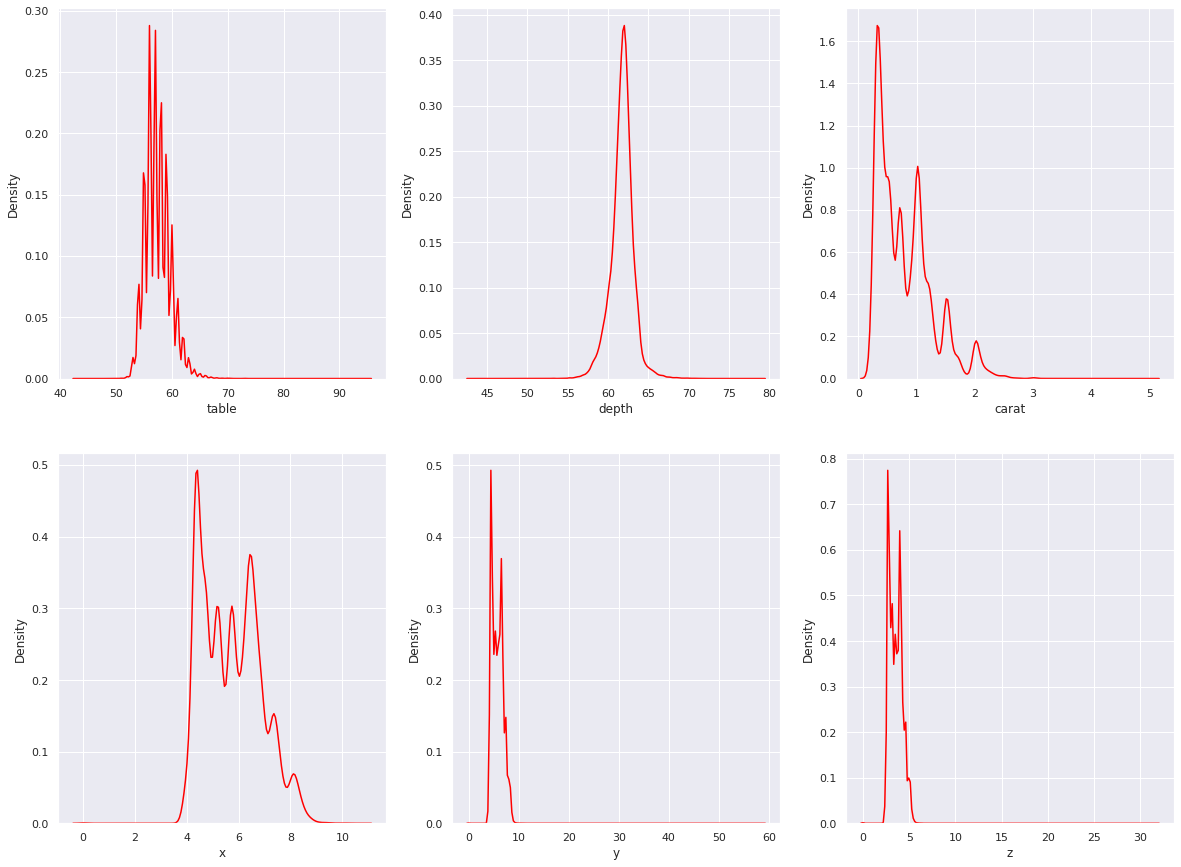

In [15]:
fig = plt.figure(figsize=(20, 15));
gs0 = mpl.gridspec.GridSpec(2,3, figure=fig);


ax_table = fig.add_subplot(gs0[0,0]);
ax_depth = fig.add_subplot(gs0[0,1]);
ax_carat = fig.add_subplot(gs0[0,2]);

ax_x = fig.add_subplot(gs0[1,0]);
ax_y = fig.add_subplot(gs0[1,1]);
ax_z = fig.add_subplot(gs0[1,2]);

features = {ax_table : "table", ax_depth : "depth", ax_carat : "carat",
            ax_x : "x", ax_y : "y", ax_z : "z"};

[sns.kdeplot(data=diamonds[feature], ax=ax, color = 'red') for ax, feature in features.items()];



Nei grafici soprastanti è possibile visualizzare la distribuzione di densità di alcune feature.

Tramite questo tipo di grafico riusciamo a visualizzare come sono distribuiti i valori delle diverse variabili numeriche insieme alla loro densità di probabilità.

Per individuare l'effettiva probabilità che esca un certo insieme di valori piuttosto che un altro sarebbe necessario calcolare un integrale definito sugli estremi dell'intervallo.

Proseguiamo l'esplorazione dei dati visualizzando alcuni plot relativi alla correlazione tra variabili

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


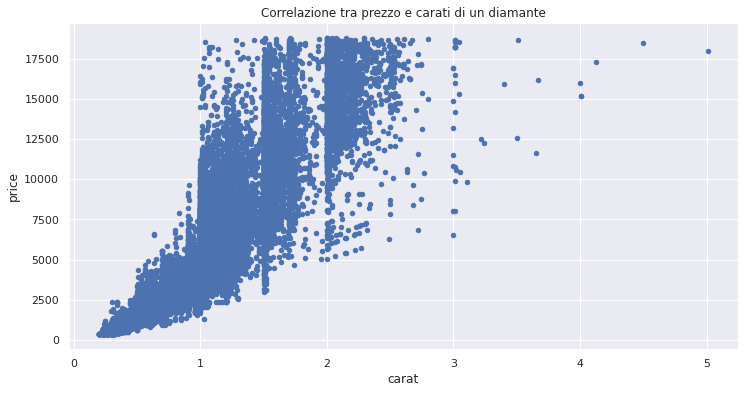

In [16]:

diamonds.plot.scatter("carat", "price", figsize=(12,6));
plt.title("Correlazione tra prezzo e carati di un diamante");

Nel grafico a dispersione mostrato qui sopra è possibile notare una certa correlazione tra le due variabili prezzo e carati.

 Tale correlazione però tende a diminuire per diamanti di peso maggiore ad 1 carato

Prima di valutare i grafici a dispersione relativi
alle dimensioni del diamante, eliminiamo tutti i valori di x,y e z uguali a 0

In [17]:
print("diamonds with a length equal to 0 are "+ str(diamonds.loc[diamonds["x"] == 0].x.count()))
print("diamonds with a width equal to 0 are "+ str(diamonds.loc[diamonds["y"] == 0].y.count()))
print("diamonds with a depth equal to 0 are "+ str(diamonds.loc[diamonds["z"] == 0].z.count()))

diamonds with a length equal to 0 are 8
diamonds with a width equal to 0 are 7
diamonds with a depth equal to 0 are 20


In [18]:
diamonds.drop(diamonds.loc[diamonds["x"] == 0].index, inplace=True)
diamonds.drop(diamonds.loc[diamonds["y"] == 0].index, inplace=True)
diamonds.drop(diamonds.loc[diamonds["z"] == 0].index, inplace=True)

Text(0.5, 0, 'profondità (mm)')

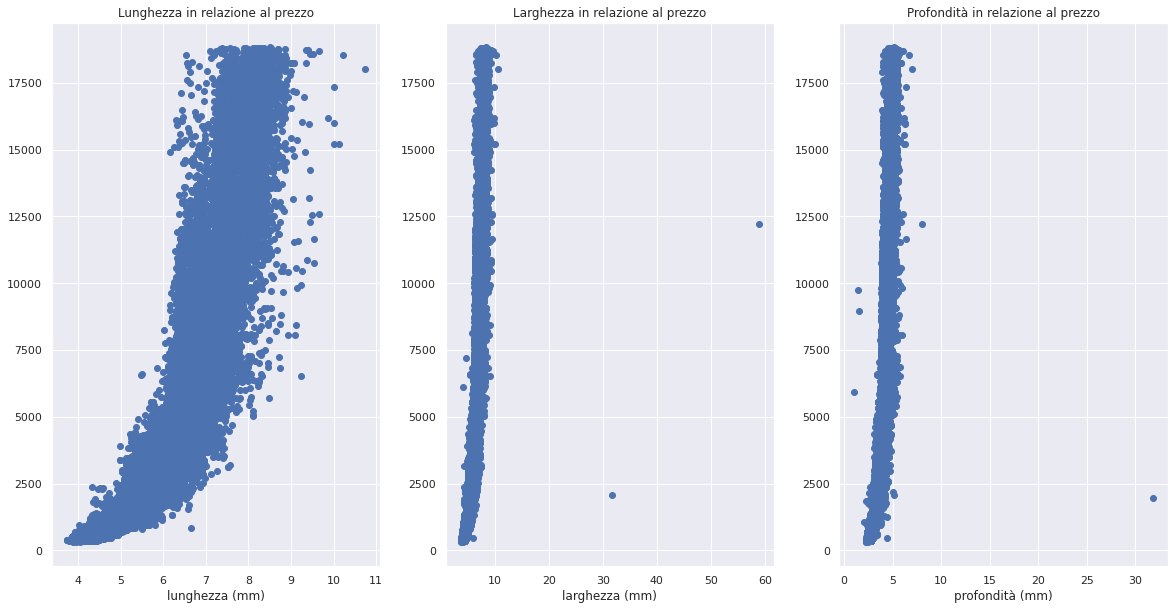

In [19]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.scatter(diamonds["x"], diamonds["price"])
plt.title("Lunghezza in relazione al prezzo")
plt.xlabel("lunghezza (mm)")

plt.subplot(1, 3, 2)
plt.scatter(diamonds["y"], diamonds["price"])
plt.title("Larghezza in relazione al prezzo")
plt.xlabel("larghezza (mm)")

plt.subplot(1, 3, 3)
plt.scatter(diamonds["z"], diamonds["price"])
plt.title("Profondità in relazione al prezzo")
plt.xlabel("profondità (mm)")

Attraverso gli scatter plot qui sopra mostrati è possibile notare che sono presenti dei diamanti con valori di larghezza e profondità molto più alti rispetto a tutti gli altri.

Al fine di non peggiorare la qualità dei modelli che andremo ad addestrare, procederò ad eliminare le istanze anomale

In [20]:
diamonds.drop(diamonds.loc[diamonds.y > 20].index, inplace=True)
diamonds.drop(diamonds.loc[diamonds.z > 20].index, inplace=True)

Creiamo ora una nuova feature derivata dalle componenti **x**,**y** e **z** che rappresenterà il **volume** di un diamante.

Facendo ciò possiamo poi eliminare le tre variabili relative a lunghezza, larghezza e profondità aggregandole in una unica

In [21]:
diamonds["volume"] = diamonds["x"] * diamonds["y"] * diamonds["z"]

diamonds.drop(columns=["x", "y", "z"])

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,140.766120


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


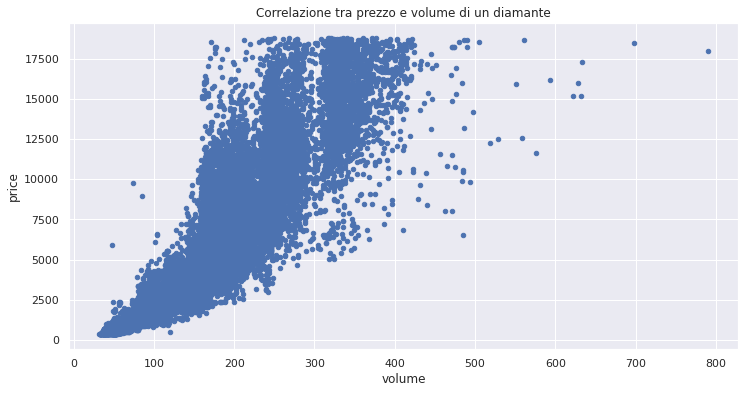

In [22]:
diamonds.plot.scatter("volume", "price", figsize=(12,6));
plt.title("Correlazione tra prezzo e volume di un diamante");

Possiamo nuovamente eliminare alcune istanze il cui valore del volume risulta essere di gran lunga superiore alle altre istanze

In [23]:
diamonds.drop(diamonds.loc[diamonds.volume > 430].index, inplace=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


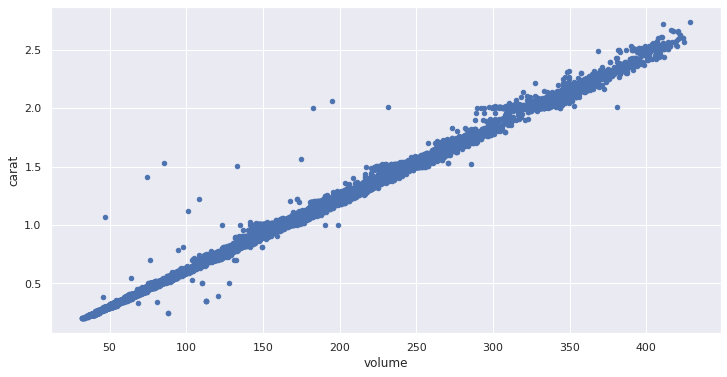

In [24]:
diamonds.plot.scatter("volume", "carat", figsize=(12,6))

Quest'ultimo scatter plot mette in evidenza come ci si potrebbe aspettare, la forte correlazione tra il volume di un diamante ed i suoi carati; ossia più generalmente la correlazione tra il volume e il peso dei diamanti

In [25]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
volume     0
dtype: int64

Prima di passare alla fase di preparazione dei dati possiamo notare che non essendoci variabili con valori nulli non avremo bisogno di occuparcene

## Preparazione dei Dati

In questa fase andremo a manipolare i dati presenti nel Dataframe al fine di individuare quali sono le feature più importanti e quali possono essere ignorate per la predizione della variabile dipendente

### Mapping delle variabili ordinali

Nel nostro dataset sono presenti tre diverse variabili ordinali:

1. cut
2. color
3. clarity

Al fine di utilizzarle per il nostro scopo ho deciso di mappare il contenuto di queste variabili su dei valori interi. 

I valori interi rispecchiano in ordine crescente le varie qualità, dalla più scarsa alla migliore.

In [26]:

cut_list = ["Fair", "Good", "Very Good", "Premium", "Ideal"];
clarity_list = ["I3", "I2", "I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF", "FL"];
color_list = ["J", "I", "H", "G", "F", "E", "D"];

cut_dictionary = dict(zip(cut_list, np.arange(1, len(cut_list) + 1)));
clarity_dictionary = dict(zip(clarity_list, np.arange(1, len(clarity_list) + 1)))
color_dictionary = dict(zip(color_list, np.arange(1, len(color_list) + 1)))

diamonds["cut_value"] = diamonds["cut"].map(cut_dictionary)
diamonds["clarity_value"] = diamonds["clarity"].map(clarity_dictionary)
diamonds["color_value"] = diamonds["color"].map(color_dictionary)

In [27]:
diamonds[["cut", "cut_value", "color", "color_value", "clarity", "clarity_value"]].head(5)

,cut,cut_value,color,color_value,clarity,clarity_value
0,Ideal,5,E,6,SI2,4
1,Premium,4,E,6,SI1,5
2,Good,2,E,6,VS1,7
3,Premium,4,I,2,VS2,6
4,Good,2,J,1,SI2,4


Dopo aver trasformato le feature ordinali in dei valori numerici, continuamo effettuando un ulteriore esplorazione di queste variabili per determinare se sono correlate al prezzo dei diamanti

<BarContainer object of 7 artists>

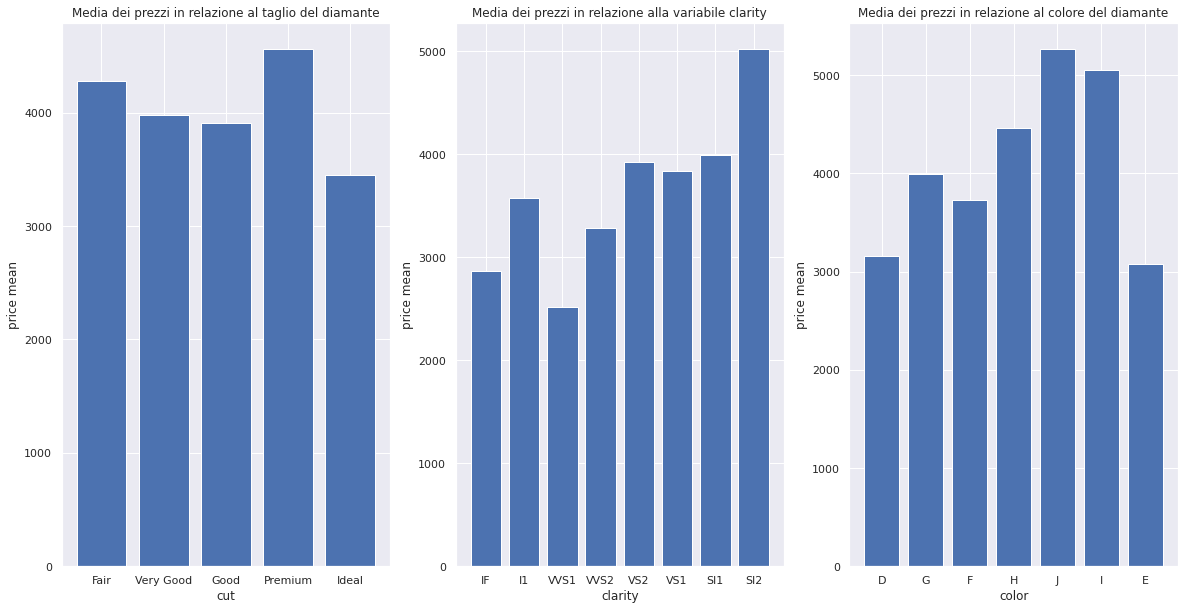

In [ ]:
cut_values = diamonds["cut"].unique().sort_values(ascending=False)
clarity_values = diamonds["clarity"].unique().sort_values(ascending=False)
color_values = diamonds["color"].unique().sort_values(ascending=False)


avg_cut_prices = []
avg_color_prices = []
avg_clarity_prices = []

[avg_cut_prices.append(diamonds.price[diamonds["cut"] == cut].mean()) for cut in cut_values]
[avg_clarity_prices.append(diamonds.price[diamonds["clarity"] == clarity].mean()) for clarity in clarity_values]
[avg_color_prices.append(diamonds.price[diamonds["color"] == color].mean()) for color in color_values]


plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.title("Media dei prezzi in relazione al taglio del diamante")
plt.xlabel("cut")
plt.ylabel("price mean")
plt.bar(diamonds["cut"].unique().sort_values(ascending=False), avg_cut_prices)

plt.subplot(1, 3, 2)
plt.title("Media dei prezzi in relazione alla variabile clarity")
plt.xlabel("clarity")
plt.ylabel("price mean")
plt.bar(diamonds["clarity"].unique().sort_values(ascending=False), avg_clarity_prices)

plt.subplot(1, 3, 3)
plt.title("Media dei prezzi in relazione al colore del diamante")
plt.xlabel("color")
plt.ylabel("price mean")
plt.bar(diamonds["color"].unique().sort_values(ascending=False), avg_color_prices)

Da questi tre grafici che mostrano le feature categoriche in relazione alla media dei prezzi per ognuna, è possibile notare che non c'è una forte correlazione tra le tre feature color, clarity, cut e il prezzo


Per terminare la fase di preparazione dei dati:

1. Eliminiamo le feature categoriche ordinali che abbiamo già provveduto a mappare su dei valori interi e le feature x,y,z che abbiamo trasformato in una nuova variabile volume

2. Standardizziamo la variabile da predire price dividendo ogni suo valore per 100, in questo modo il suo ordine di grandezza sarà simile a quello delle altre feature garantendoci di ottenere risultati più precisi durante le valutazioni dei modelli di learning

In [ ]:
diamonds.drop(columns=["cut", "color", "clarity", "x", "y", "z"], inplace=True)
diamonds["price"] = diamonds["price"] / 100

In [ ]:
diamonds.head(5)

,carat,depth,table,price,volume,cut_value,clarity_value,color_value
0,0.23,61.5,55.0,3.26,38.202030,5,4,6
1,0.21,59.8,61.0,3.26,34.505856,4,5,6
2,0.23,56.9,65.0,3.27,38.076885,2,7,6
3,0.29,62.4,58.0,3.34,46.724580,4,6,2
4,0.31,63.3,58.0,3.35,51.917250,2,4,1


## Preparazione del modello

In questa fase ci occuperemo di valutare diversi modelli di regressione al fine di individuare quello più adatto ai nostri scopi



### Regressione Lasso

Come primo modello utilizziamo una regressione **Lasso** per valutare se è possibile eliminare qualche feature meno rilevante delle altre.

Grazie a questo tipo di regressione i coefficienti delle feature che risultano molto meno importanti delle altre saranno azzerati.


Iniziamo importando le librerie necessarie

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

Ricaviamo dal dataframe:
- una serie **y** contenente la variabile da prevedere
- un dataframe **X** contenente le altre variabili

Dopo di ciò, suddividiamo X e y tramite metodo **holdout** in training e validation set

In [ ]:
X = diamonds.drop(columns="price")
y = diamonds["price"]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

Creiamo un modello di **Pipeline** con standardizzazione delle feature, regressione Lasso e usiamo una grid search con cross validation a 5 strati.

Il risultato saranno quattro diversi modelli addestrati e validati sugli iperparametri da noi forniti nella grid; in questo specifico caso l'unico iperparametro che varia sarà alpha relativo alla regolarizzazione delle feature.

In [ ]:
alphas = [0.01, 0.1, 1, 10];

model = Pipeline([
        ("scale", StandardScaler()),
        ("regr", Lasso())
])

grid = {
    "regr__alpha": alphas
}

gs = GridSearchCV(model, param_grid=grid, cv=5);

gs.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49235.68786168378, tolerance: 4616.068516767639
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51315.099096021615, tolerance: 4554.20891967905
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46317.815463787876, tolerance: 4577.112143834022
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40333.09673

Visualizzando i coefficienti delle singole feature computati con l'alpha che massimizza il test score medio notiamo che nessuna di questi è stato annullato completamente dalla regressione Lasso

Tuttavia è possibile notare che alcuni coefficienti come carat e volume risultano molto più alti rispetto agli altri; da questo possiamo dedurre che saranno molto importanti ai fini della predizione del prezzo

In [ ]:
df = pd.DataFrame(gs.best_estimator_.named_steps["regr"].coef_, X.columns).rename(columns={0 : 'coefficients'});

df.rename(columns={0 : 'coefficients'})


,coefficients
carat,20.928450
depth,-0.110573
table,-0.244860
volume,20.779212
cut_value,1.325437
clarity_value,8.621023
color_value,5.465419


Poichè depth e table risultano essere non essenziali ai fini della predizione a causa dell'esiguo valore dei loro coefficienti, ho deciso di rimuoverli.

In [ ]:
diamonds.drop(columns=["depth","table"], inplace=True)

KeyError: ignored


In aggiunta ai precedenti valori dei coefficienti possiamo anche mostrare i risultati ottenuti dai vari modelli e ordinarli dal punteggio di test migliore a quello peggiore

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regr__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.274544,0.015171,0.006167,0.000386,0.01,{'regr__alpha': 0.01},0.910813,0.910548,0.906869,0.910406,0.905423,0.908812,0.002228,1
1,0.280380,0.012786,0.006468,0.000896,0.1,{'regr__alpha': 0.1},0.910847,0.910527,0.906725,0.910470,0.905372,0.908788,0.002281,2
2,0.231814,0.013314,0.006670,0.001721,1,{'regr__alpha': 1},0.907336,0.906893,0.901357,0.907421,0.901211,0.904844,0.002912,3
3,0.109410,0.015231,0.007483,0.002112,10,{'regr__alpha': 10},0.795084,0.796354,0.784496,0.799971,0.788395,0.792860,0.005615,4


In [ ]:
print("Parametri migliori: {}".format(gs.best_params_))

Parametri migliori: {'regr__alpha': 0.01}


Il modello migliore ha una precisione del 90% e risulta essere quello con iperparametro alpha uguale a 1. 

Tuttavia è possibile notare che la differenza con i test score medi degli altri modelli aventi alpha diversi è insignificante

### Regressione Lineare

Dopo aver constatato che tutte le feature di cui disponiamo ora sono rilevanti per poter stimare la variabile da predire, proseguiamo addestrando e valutando l'accuratezza dei nostri dati su un semplice modello di regressione lineare con cross validation a 5 fold e standardizzazione delle feature.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [ ]:
X = diamonds.drop(columns="price")
y = diamonds["price"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

In [ ]:
model = Pipeline([
    ("scale", StandardScaler()),
    ("linreg", LinearRegression())
])

kf = KFold(5, shuffle=True, random_state=42)

cv_result = cross_validate(model, X, y, cv=kf, return_train_score=True)

In [ ]:
cv_dataframe = pd.DataFrame(cv_result)
cv_dataframe[["train_score", "test_score"]].agg(["mean"])

,train_score,test_score
mean,0.909692,0.909658


Anche con questo modello lineare otteniamo un punteggio simile a quello già ottenuto tramite regressione Lasso

### Regression Ridge

Sfruttiamo ora la Ridge Regression per valutare se il modello subisce dei miglioramenti in seguito alla regolarizzazione delle feature.

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Pipeline([
          ("scale", StandardScaler()),
          ("linreg", Ridge())        
])

alphas = [0.01, 0.1, 1, 10, 20];
folds = [3, 5, 10];

grid = {
    "linreg__alpha": alphas,
}

gs = GridSearchCV(model, param_grid=grid, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('linreg',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'linreg__alpha': [0.01, 0.1, 1, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=N

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_linreg__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.020593,0.001370,0.005736,0.000627,10,{'linreg__alpha': 10},0.910808,0.910495,0.906944,0.910441,0.905525,0.908843,0.002180,1
4,0.021296,0.002100,0.005451,0.000074,20,{'linreg__alpha': 20},0.910812,0.910517,0.906929,0.910437,0.905512,0.908841,0.002190,2
2,0.024411,0.005250,0.005737,0.000374,1,{'linreg__alpha': 1},0.910796,0.910450,0.906960,0.910447,0.905546,0.908840,0.002163,3
1,0.020984,0.001325,0.005504,0.000157,0.1,{'linreg__alpha': 0.1},0.910793,0.910443,0.906962,0.910448,0.905549,0.908839,0.002160,4
0,0.023073,0.002278,0.005722,0.000174,0.01,{'linreg__alpha': 0.01},0.910793,0.910442,0.906962,0.910448,0.905549,0.908839,0.002160,5


Il modello migliore risulta essere quello addestrato con alpha=10.

Come per la precedente grid search effettuata per addestrare più modelli Lasso, notiamo che il mean_test_score si assesta per tutti i modelli sul 90%

In [ ]:
df = pd.DataFrame(gs.best_estimator_.named_steps["linreg"].coef_, X.columns).rename(columns={0 : 'coefficients'});

df.rename(columns={0 : 'coefficients'})

,coefficients
carat,16.552643
depth,-0.032758
table,-0.195393
volume,25.147157
cut_value,1.312791
clarity_value,8.624921
color_value,5.474801




Sia lo score medio che i coefficienti delle feature sono rimasti pressochè uguali sia utilizzando Lasso, Ridge o una LinearRegression senza regolarizzazione; ciò denota che in questo caso la regolarizzazione delle feature non incide particolarmente sul risultato finale.

### ElasticNet

Avendo testato il punteggio sia di un modello addestrato con Lasso, sia di uno addestrato con Ridge e avendo ottenuto gli stessi risultati, ho deciso di provare ad addestrare dei modelli ElasticNet.
Quest'ultima permette di applicare entrambe le penalizzazioni con norma L1 e L2 dei θ

Ciò che mi aspetto è che anche in questo caso, poichè la regolarizzazione come abbiamo detto non influisce particolarmente sul risultato, il test score medio risulti molto simile a quelli già ottenuti con i precedenti modelli

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
model = Pipeline([
        ("scale", StandardScaler()),
        ("regr", ElasticNet())
])

alphas = [0.1, 1, 10];
l1_ratios = np.linspace(0.1, 0.9, 9)

grid = {
    "regr__alpha": alphas,
    "regr__l1_ratio":l1_ratios
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

gs = GridSearchCV(model, grid, cv=kf);
gs.fit(X_train, y_train);

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regr__alpha,param_regr__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.106850,0.008164,0.007821,0.003712,0.1,0.9,"{'regr__alpha': 0.1, 'regr__l1_ratio': 0.9}",0.908836,0.903911,0.906822,0.912179,0.911113,0.908572,0.002977,1
7,0.079372,0.012174,0.007830,0.004099,0.1,0.8,"{'regr__alpha': 0.1, 'regr__l1_ratio': 0.8}",0.908608,0.903808,0.906524,0.911849,0.910999,0.908358,0.002943,2
6,0.059565,0.004636,0.008030,0.002847,0.1,0.7,"{'regr__alpha': 0.1, 'regr__l1_ratio': 0.70000...",0.908298,0.903619,0.906149,0.911436,0.910798,0.908060,0.002910,3
5,0.061820,0.010765,0.009113,0.004217,0.1,0.6,"{'regr__alpha': 0.1, 'regr__l1_ratio': 0.6}",0.907910,0.903351,0.905700,0.910948,0.910515,0.907685,0.002879,4
4,0.049022,0.008524,0.005728,0.000110,0.1,0.5,"{'regr__alpha': 0.1, 'regr__l1_ratio': 0.5}",0.907451,0.903007,0.905190,0.910391,0.910154,0.907239,0.002849,5


In [ ]:
gs.best_params_

{'regr__alpha': 0.1, 'regr__l1_ratio': 0.9}

Come previsto, anche questa volta il risultato del test score medio si aggira intorno al 90%

### Modelli di Regressione Polinomiale
 
Dopo aver testato diversi modelli lineari ottenendo sempre punteggi molto vicini tra loro, ho deciso di sfruttare dei modelli polinomiali.

#### Regressione Polinomiale senza regolarizzazione

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
model = Pipeline([
          ("poly", PolynomialFeatures(include_bias=False)),
          ("scale", StandardScaler()),
          ("linreg", LinearRegression()) 
])

grid = {
    "poly__degree": [2,3]
}

gs = GridSearchCV(model, grid, cv=kf)
gs.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('linreg',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                     

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.151772,0.004911,0.011573,0.000096,3,{'poly__degree': 3},0.972030,0.965889,0.975578,0.969288,0.977745,0.972106,0.004253,1
0,0.048914,0.020194,0.006650,0.002507,2,{'poly__degree': 2},0.956863,0.956521,0.959608,0.959704,0.963574,0.959254,0.002537,2


Già solo utilizzando una regressione di grado 2 otteniamo uno score del 96%, nettamente migliore rispetto ai precedenti modelli lineari.

Il costo di questo miglioramento è da ricercarsi in un aumento del numero di coefficienti da 7 a 36


Anche con un filtro polinomiale di grado 3 il punteggio è più alto rispetto ai modelli lineari (97%), tuttavia la differenza rispetto al punteggio ottenuto con il filtro di grado due non è così tanta se consideriamo che i coefficienti sono aumentati da 7 a 120.







In [ ]:
print("Numero coefficienti modello grado 3: {}".format(len(gs.best_estimator_.named_steps["linreg"].coef_) + 1))

Numero coefficienti modello grado 3: 120


Qui sotto possiamo anche vedere l'effetto che il filtro polinomiale ha avuto sui coefficienti: tutti risultano maggiori rispetto ai precedenti, alcuni anche di 2 o 3 ordini di grandezza.



In [ ]:
gs.best_estimator_.named_steps["linreg"].coef_[:20]

array([  -21.33094093,    11.28167735,     4.07430617,    26.28774123,
          20.73567815,   730.22712065, -1709.6379343 ,    90.22818408,
          87.74195234,    30.3709941 ,  1029.90855974,   -82.54848665,
         -94.91845912,   -59.51368413,   -25.30574495,    10.33006936,
           3.32661666,   -34.96429761,   -49.57833419,     4.13500799])

#### Regressione polinomiale con regolarizzazione L2

Per valutare come si comporta anche la Ridge regression con feature polinomiali, procedo ad addestrare diversi modelli tramite grid search utilizzando come alpha i valori che avevano restituito i punteggi migliori nei modelli lineari

In [ ]:
model = Pipeline([
          ("poly", PolynomialFeatures(degree=2, include_bias=False)),
          ("scale", StandardScaler()),
          ("linreg", Ridge()) 
])

grid = {
    "poly__degree": [2,3],
    "linreg__alpha": [0.1, 10]
}

gs = GridSearchCV(model, grid, cv=kf);
gs.fit(X_train, y_train);

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_linreg__alpha,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.075928,0.016447,0.008271,0.001900,0.1,3,"{'linreg__alpha': 0.1, 'poly__degree': 3}",0.972198,0.971484,0.975679,0.973473,0.977549,0.974077,0.002247,1
3,0.086177,0.025883,0.010828,0.003409,10,3,"{'linreg__alpha': 10, 'poly__degree': 3}",0.971834,0.970830,0.975175,0.973065,0.977156,0.973612,0.002289,2
0,0.029109,0.005880,0.005154,0.001198,0.1,2,"{'linreg__alpha': 0.1, 'poly__degree': 2}",0.956902,0.957100,0.959630,0.959739,0.963573,0.959389,0.002413,3
2,0.035557,0.011978,0.005359,0.001826,10,2,"{'linreg__alpha': 10, 'poly__degree': 2}",0.957218,0.956940,0.959380,0.960007,0.963391,0.959387,0.002328,4


Per l'ennesima volta la regolarizzazione non ha un peso rilevante nel calcolo del punteggio finale che risulta essere al 97% per i modelli di grado 3 e al 96% per i modelli di grado 2.

A differenza però di ciò che succedeva nei modelli lineari, qui la regolarizzazione è molto importante per limitare la grandezza dei coefficienti:
l'ultimo modello analizzato presenta infatti coefficienti di ordine di grandezza equiparabile a quello dei coefficienti nei modelli lineari

In [ ]:
gs.best_estimator_.named_steps["linreg"].coef_[:20]

array([ -1.01064514, -10.42190552,   5.02411497,  26.92588721,
        20.76545859, -36.06721314,  -3.59333461,  20.36120205,
        25.77479008,   2.10998542,  89.05905442, -10.02914995,
       -32.00299953, -30.9995074 , -26.84253326,   7.53373396,
         3.14481352, -35.40093672, -49.53284042,   4.00033636])

### Albero di Regressione e Random Forest
 
Gli ultimi due modelli che utilizzeremo impiegano gli alberi decisionali per effettuare la regressione.
 
 
 
Il primo algoritmo permette di generare una struttura ad albero che avrà:
- come nodi una serie di predicati sul valore delle  feature del dataset
 
- come foglie i valori della variabile y predetti in relazione ai predicati dei nodi genitori
 
Random Forest è un modello che genera diversi alberi di regressione e effettua una predizione basandosi sulla media delle predizioni effettuate dai singoli alberi; quest'ultimo risulta essere in letteratura uno dei migliori algoritmi di machine learning grazie anche alla sua capacità di parallelizzare le computazioni di ogni singolo albero.

Iniziamo addestrando un primo modello DecisionTreeRegressor tramite grid search

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = DecisionTreeRegressor(random_state=42)

grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [0.02, 0.05, 0.1, 2]
}


gs = GridSearchCV(model, grid, cv=kf);
gs.fit(X_train, y_train);

In [ ]:
gs.best_params_

{'max_depth': 10, 'min_samples_split': 2}

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.062970,0.001557,0.002994,0.000126,10,2,"{'max_depth': 10, 'min_samples_split': 2}",0.975636,0.972727,0.975972,0.974981,0.978621,0.975587,0.001892,1
15,0.099581,0.001296,0.004344,0.000071,None,2,"{'max_depth': None, 'min_samples_split': 2}",0.964796,0.963033,0.967775,0.966400,0.968527,0.966106,0.001995,2
12,0.049975,0.000644,0.002843,0.000295,None,0.02,"{'max_depth': None, 'min_samples_split': 0.02}",0.951170,0.947561,0.954456,0.947991,0.955177,0.951271,0.003160,3
8,0.049709,0.001280,0.002676,0.000048,10,0.02,"{'max_depth': 10, 'min_samples_split': 0.02}",0.951158,0.947552,0.954447,0.947985,0.955167,0.951262,0.003159,4
7,0.036378,0.000557,0.002465,0.000032,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.937203,0.933842,0.937627,0.938407,0.941811,0.937778,0.002550,5


In [ ]:
from sklearn.tree import export_text, plot_tree

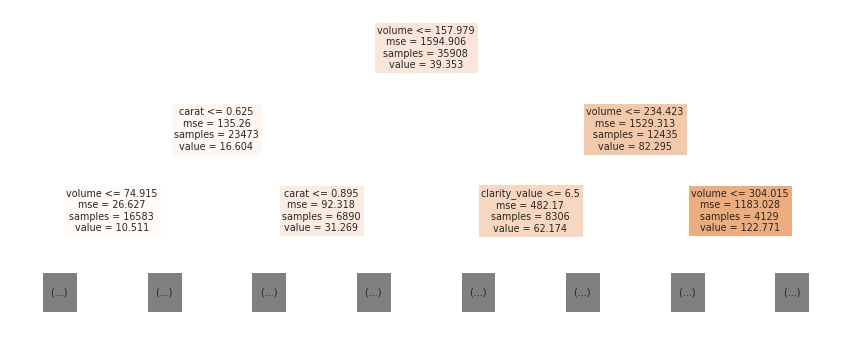

In [ ]:
plt.figure(figsize=(15,6))
plot_tree(gs.best_estimator_, feature_names=list(X.columns), max_depth=2, filled=True);


In [ ]:
print(export_text(gs.best_estimator_, feature_names=list(X.columns), max_depth=3))

|--- volume <= 157.98
|   |--- carat <= 0.62
|   |   |--- volume <= 74.91
|   |   |   |--- carat <= 0.38
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- carat >  0.38
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- volume >  74.91
|   |   |   |--- clarity_value <= 7.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- clarity_value >  7.50
|   |   |   |   |--- truncated branch of depth 7
|   |--- carat >  0.62
|   |   |--- carat <= 0.89
|   |   |   |--- clarity_value <= 5.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- clarity_value >  5.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- carat >  0.89
|   |   |   |--- clarity_value <= 4.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- clarity_value >  4.50
|   |   |   |   |--- truncated branch of depth 7
|--- volume >  157.98
|   |--- volume <= 234.42
|   |   |--- clarity_value <= 6.50
|   |   |   |--- clarity_value <= 5.50
|   |   | 

Con il modello che sfrutta un albero di regressione di profondità 10 siamo riusciti ad ottenere uno score medio nel test set del 97.5%; punteggio pressochè identico a quello ottenuto con una regressione di grado 3.

Ma ora proseguiamo addestrando il modello RandomForestRegressor; ciò che mi aspetto è che anche in questo caso gli iperparametri migliori selezionati dalla grid search siano equivalenti a quelli del modello precedente; questo semplicemente per il fatto che come già detto, alla base del funzionamento di Random Forest si trovano sempre degli alberi di regressione


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42);

grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [0.02, 0.05, 0.1, 2]
}

gs = GridSearchCV(model, grid, cv=kf)
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,3.828534,0.014246,0.078775,0.001057,10,2,"{'max_depth': 10, 'min_samples_split': 2}",0.979653,0.978124,0.980789,0.979242,0.983165,0.980195,0.001712,1
15,6.051083,0.020400,0.200369,0.003501,None,2,"{'max_depth': None, 'min_samples_split': 2}",0.978428,0.977407,0.980341,0.979106,0.982509,0.979558,0.001757,2
12,2.767488,0.009097,0.049296,0.000802,None,0.02,"{'max_depth': None, 'min_samples_split': 0.02}",0.950702,0.946067,0.953741,0.950915,0.955063,0.951297,0.003099,3
8,2.778787,0.011340,0.049426,0.000693,10,0.02,"{'max_depth': 10, 'min_samples_split': 0.02}",0.950701,0.946060,0.953740,0.950914,0.955060,0.951295,0.003100,4
7,2.240260,0.009080,0.039577,0.000844,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.949304,0.945827,0.951727,0.948774,0.953696,0.949865,0.002681,5


Come da aspettative gli iperparametri selezionati dalla grid search sono stati gli stessi selezionati dal modello RegressionTree, inoltre tramite RandomForest abbiamo raggiunto un mean test score del 98%

## Scelta dei modelli migliori
 
In questa parte mi occuperò di selezionare e valutare i modelli che hanno dato i risultati migliori:
 
1. Ridge Regression polinomiale
2. Albero di regressione
3. Random Forest

In [ ]:
ridge_polynomial = Pipeline([
      ("poly", PolynomialFeatures(degree=3, include_bias=False)),            
      ("scale", StandardScaler()),
      (("regr", Ridge(alpha=0.1)))
])

regression_tree = DecisionTreeRegressor(max_depth=10, min_samples_split=2, random_state=42)

random_forest = RandomForestRegressor(max_depth=10, min_samples_split=2, random_state=42);

ridge_polynomial.fit(X_train, y_train);
regression_tree.fit(X_train, y_train);
random_forest.fit(X_train, y_train);

Per valutare le metriche dei nostri modelli utilizziamo le funzioni viste in laboratorio che ci permetteranno di ottenere: MSE (Mean Squared Error), MAE (Mean Absolute Error), errore relativo e coefficiente di determinazione R^2

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

def print_eval(X, y, model):
    preds = model.predict(X)
    print("   Mean squared error: {:.5}".format(mean_squared_error(y, preds)))
    print("   Mean absolute error: {:.5}".format(mean_absolute_error(y, preds)))
    print("       Relative error: {:.5%}".format(relative_error(y, preds)))
    print("R-squared coefficient: {:.5}".format(r2_score(y, preds)))

In [ ]:
def get_R_squared(model, X, y):
  preds = model.predict(X);
  return r2_score(y, preds);

In [ ]:
print("Modello Ridge Polinomiale:")
print_eval(X_val, y_val, ridge_polynomial)

Modello Ridge Polinomiale:
   Mean squared error: 41.226
   Mean absolute error: 3.7366
       Relative error: 13.47479%
R-squared coefficient: 0.97333


In [ ]:
print("Modello Regression Tree:")
print_eval(X_val, y_val, regression_tree)

Modello Regression Tree:
   Mean squared error: 37.356
   Mean absolute error: 3.2409
       Relative error: 9.26579%
R-squared coefficient: 0.97583


In [ ]:
print("Modello Random Forest:")
print_eval(X_val, y_val, random_forest)

Modello Random Forest:
   Mean squared error: 31.269
   Mean absolute error: 2.9299
       Relative error: 8.51422%
R-squared coefficient: 0.97977


E' possibile notare come le metriche di valutazione degli ultimi due modelli siano molto simili tra loro.

In ogni caso il modello di Random Forest presenta dei risultati migliori rispetto agli altri modelli, in particolare:
- un valore di R<sup>2</sup> così alto ci indica che il modello predice molto bene il valore della variabile dipendente

- l'errore relativo è inferiore dell'1% rispetto al modello Regression Tree

- MSE e MAE mostrano come la vicinanza tra valori predetti e valori effettivi per il modello di Random Forest siano migliori rispetto agli altri

Prima di procedere con la selezione del modello valutato come migliore, confronterò tra di loro i modelli analizzandone l'intervallo di confidenza per il valore di R<sup>2</sup> fissata un'accuratezza del 95%




In [ ]:
from scipy import stats

In [ ]:
def models_difference(model1_error, model2_error, confidence):
    z_half_alfa = stats.norm.ppf(confidence)
    variance = (((1 - model1_error) * model1_error) / len(y_val)) + (((1 - model2_error) * model2_error) / len(y_val))
    d_minus = abs(model1_error - model2_error) - z_half_alfa * (pow(variance, 0.5))
    d_plus = abs(model1_error - model2_error) + z_half_alfa * (pow(variance, 0.5))

    if d_plus * d_minus < 0:
      d = abs(model1_error - model2_error) / pow(variance, 0.5);
      confidence = stats.norm.cdf(d)
      print("Confidenza per cui la differenza tra i modelli è statisticamente significativa: {}".format(confidence))


    print("Valore minimo: {}\nValore massimo: {}\n".format(d_minus, d_plus))

ridge_error = 1 - get_R_squared(ridge_polynomial, X_val, y_val);
tree_error = 1 - get_R_squared(regression_tree, X_val, y_val);
forest_error = 1 - get_R_squared(random_forest, X_val, y_val);

print("Ridge Polynomial e Tree Regression:")
models_difference(ridge_error, tree_error, 0.95)

print("Ridge Polynomial e Random Forest:")
models_difference(ridge_error, forest_error, 0.95)

print("Random Forest e Tree Regression:")
models_difference(forest_error, tree_error, 0.95)

Ridge Polynomial e Tree Regression:
Confidenza per cui la differenza tra i modelli è statisticamente significativa: 0.9341469511816639
Valore minimo: -0.00022831789367679534
Valore massimo: 0.005236383310707378

Ridge Polynomial e Random Forest:
Valore minimo: 0.003814985101326208
Valore massimo: 0.009068071559051937

Random Forest e Tree Regression:
Valore minimo: 0.0013800413784751065
Valore massimo: 0.006494949864872456



Dalla precedente analisi notiamo che la differenza tra i due modelli Ridge Polynomial e Regression Tree non è statisticamente significativa poichè comprende 0 nell'intervallo. Perchè la differenza tra loro diventi statisticamente significative sarebbe necessario impostare la confidenza al 93,4%.


Per testare questa ipotesi rieseguiamo il calcolo dell'intervallo solo per i due modelli Ridge e Regression Tree fissando la confidenza a tale percentuale, ciò che noteremo è che l'intervallo non comprende più il valore 0 sebbene il valore minimo sia molto vicino a diventare minore di 0



In [ ]:
print("Ridge Polynomial e Tree Regression:")
models_difference(ridge_error, tree_error, 0.934)

Ridge Polynomial e Tree Regression:
Valore minimo: 1.9042156073774928e-06
Valore massimo: 0.005006161201423205



Terminata l'analisi tra modelli procediamo scegliendo come modello di riferimento quello che impiega Random Forest poichè:
1. Risulta metricamente migliore dei modelli Regression Tree e Ridge polinomiale

2. Presenta delle differenze con gli altri modelli statisticamente significative

## Valutazione delle informazioni apprese dal modello

Di seguito valuterò la conoscenza appresa dal modello di Random Forest visualizzando testualmente uno degli alberi di regressione che lo compone ed i coefficenti delle feature

In [ ]:
print(export_text(random_forest.estimators_[0], feature_names=list(X.columns), max_depth=3))

|--- volume <= 158.43
|   |--- carat <= 0.64
|   |   |--- volume <= 76.42
|   |   |   |--- carat <= 0.38
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- carat >  0.38
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- volume >  76.42
|   |   |   |--- clarity_value <= 7.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- clarity_value >  7.50
|   |   |   |   |--- truncated branch of depth 7
|   |--- carat >  0.64
|   |   |--- carat <= 0.87
|   |   |   |--- clarity_value <= 5.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- clarity_value >  5.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- carat >  0.87
|   |   |   |--- clarity_value <= 4.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- clarity_value >  4.50
|   |   |   |   |--- truncated branch of depth 7
|--- volume >  158.43
|   |--- volume <= 234.42
|   |   |--- clarity_value <= 6.50
|   |   |   |--- clarity_value <= 5.50
|   |   | 

Dalla rappresentazione testuale di uno dei 100 alberi generati da Random Forest possiamo determinare quali siano le feature più importanti ai fini della predizione della variabile dipendente.

Prima tra tutte individuiamo il volume, il suo valore funge da partizionatore principale dell'albero 

Altre due feature su cui il modello si basa per effettuare la predizione sono i carati dei diamanti e la loro clarity che risultano essere i principali partizionatori dell'albero per una profondità uguale a 3

In [ ]:
pd.Series(random_forest.feature_importances_, index=X.columns)

carat            0.085097
volume           0.813362
cut_value        0.001520
clarity_value    0.067807
color_value      0.032214
dtype: float64

Dai coefficienti computati dal modello di Random Forest è ancora più evidente come il volume abbia un ruolo fondamentale nelle nostre predizioni, il suo valore di 0.81 risulta essere 10 volte più grande del secondo coefficiente con il valore più alto (carat: 0.085).

Al contrario il valore del coefficiente relativo al taglio del diamante (cut_value: 0.0015) assume un valore di 20 volte inferiore rispetto al secondo coefficiente più piccolo (color_value: 0.032), denotando la sua scarsità di rilevanza all'interno di questo modello

## Conclusioni

Mi ritengo personalmente soddisfatto del lavoro fatto, analizzando e alterando con cura determinate feature e istanze del dataset siamo riusciti a sviluppare diversi modelli di regressione, il migliore tra questi ha prodotto uno score del 98% (Random Forest), stesso score ottenuto dalla miglior Task sottomessa su Kaggle per questo Dataset.